<h1 style='color:#00868b'>LDA_v1_balanced<span class="tocSkip"></span></h1>

# Start

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Read dataset

In [2]:
df = pd.read_csv("../../corpus_sprint3_balanced_cleaned_all.csv", encoding="utf-8")

Set index to old index:

In [3]:
df = df.set_index('Row No')

In [4]:
df.shape

(126593, 18)

In [5]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
Row No,,,,,,,,,,,,,,,,,,
9,06/15/19,"Payday loan, title loan, or personal loan",Installment loan,Problem with the payoff process at the end of ...,None,they would not let me pay my loan off days bef...,None,"Big Picture Loans, LLC",IN,477XX,None,Consent provided,Web,06/15/19,Closed with explanation,Yes,NaN,3276316
12,07/25/19,"Payday loan, title loan, or personal loan",Installment loan,Charged fees or interest you didn't expect,None,service finance are liars and are charging me ...,None,"Service Finance Holdings, LLC",TX,None,None,Consent provided,Web,07/25/19,Closed with non-monetary relief,Yes,NaN,3318533
38,06/23/19,Vehicle loan or lease,Loan,Problems at the end of the loan or lease,Problem with paying off the loan,on i signed a car loan agreement to finance my...,None,"HUNTINGTON NATIONAL BANK, THE",TX,750XX,None,Consent provided,Web,06/23/19,Closed with non-monetary relief,Yes,NaN,3284279
44,08/13/19,"Money transfer, virtual currency, or money ser...",Debt settlement,Fraud or scam,None,we hired and debt collection to handle collect...,None,ALLIED NATIONAL INC,NY,117XX,None,Consent provided,Web,08/13/19,Untimely response,No,NaN,3339246
52,07/31/19,"Payday loan, title loan, or personal loan",Payday loan,Problem with the payoff process at the end of ...,None,i borrowed in an financial emergency from offi...,Company believes it acted appropriately as aut...,"Harpeth Financial Services, LLC",TN,None,Servicemember,Consent provided,Web,08/02/19,Closed with explanation,Yes,NaN,3324772


Example:

In [6]:
df["Consumer complaint narrative"][52]

'i borrowed in an financial emergency from office in tn on then on at in tn i was told my payoff is so i paid however i have been charged much more than on i paid off the loan in person and my checking account was also double billed charged another in tn today i went into the office in tn and asked for the reimbursement of my overbilled monies and the clerk named refused to refund my over double billed charges! threatened to have me arrested if i did not let the office keep the monies my loan of was just for days i was forced to pay a total of i was overbilled double billed '

## Additional preprocessing

### Tokenize words, remove stop words and stem words 

Stemming reduces the variation in text data by converting words to their word stem. Applying stemming allows for LDA to focus much more finely on the base form of a word, rather than focusing on the differences in the various variations of a word. The code below is analagous to sprint 1's code in [<code>lemmatization.py</code>](lemmatization.py).

Stop words include: 
* common English words;
* state names;
* other frequent words that add little to no value to the context.

In [7]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# use nltk.download('stopwords') to download the list of stop words if this is your first time using nltk
nltk.download('stopwords')

stop_words = nltk.corpus.stopwords.words('english')
my_additional_stop_words = []

# US states, capitalised and lower
states_abbr = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

states_abbr = [item.lower() for item in states_abbr]
states = [item.lower() for item in states]
states.extend(states_abbr)

# add to list of additional stop words
my_additional_stop_words.extend(states)
print("Length of extra list: ", len(my_additional_stop_words))

# add other stop words
my_additional_stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])
print("Length of extra list: ", len(my_additional_stop_words))

# add nltk's stop words
my_stop_words = stop_words + my_additional_stop_words
print("Length of my_stop_words list: ", len(my_stop_words))

Length of extra list:  101
Length of extra list:  143
Length of my_stop_words list:  322


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bryan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords

ps = PorterStemmer()

i = 0

for ind, complaint in df["Consumer complaint narrative"].items():
    i = i+1
    # Tokenize the complaint and remove stop words
    words = [word for word in complaint.split(' ')
                            if word not in my_stop_words] 
    new_words = []
    # Stem the words in the complaint
    for word in words:
        new_words.append(ps.stem(word))
    df["Consumer complaint narrative"][ind] = new_words
    if (i % 1000) == 0:
        print(i)

# to csv for later use
df.to_csv("corpus_sprint3_cleaned_and_stemmed_v1.csv", index=False)

df.shape

C:\Users\bryan\.conda\envs\ml\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000


(126593, 18)

Example:

In [9]:
df['Consumer complaint narrative'][52]

['borrow',
 'financi',
 'emerg',
 'offic',
 'told',
 'payoff',
 'paid',
 'howev',
 'charg',
 'much',
 'paid',
 'loan',
 'person',
 'check',
 'account',
 'doubl',
 'bill',
 'charg',
 'anoth',
 'today',
 'went',
 'offic',
 'ask',
 'reimburs',
 'overbil',
 'moni',
 'clerk',
 'name',
 'refus',
 'refund',
 'doubl',
 'bill',
 'charges!',
 'threaten',
 'arrest',
 'let',
 'offic',
 'keep',
 'moni',
 'loan',
 'day',
 'forc',
 'pay',
 'total',
 'overbil',
 'doubl',
 'bill',
 '']

In [10]:
df['Consumer complaint narrative']

Row No
9         [let, pay, loan, day, next, payment, plu, subs...
12        [servic, financ, liar, charg, interest, hvac, ...
38        [sign, car, loan, agreement, financ, car, loan...
44        [hire, debt, collect, handl, collect, effort, ...
52        [borrow, financi, emerg, offic, told, payoff, ...
                                ...                        
311078    [bank, sever, year, bank, trust, origin, husba...
368588    [file, fraud, alert, bank, week, ago, call, ev...
256815    [previou, trip, use, bank, america, atm, card,...
193394    [account, td, bank, check, save, start, work, ...
257330    [hello, receiv, promot, offer, code, citibank,...
Name: Consumer complaint narrative, Length: 126593, dtype: object

We have now turned every complaint into an array of its words.

### Creating the dictionary and corpus

The two main inputs to our LDA topic model are the Dictionary (id2word) and the corpus. Let's create them ([source](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/)).

We remove rare words and common words based on their document frequency. Below we remove words that appear in less than 20 documents or in more than 50% of the documents.

In [11]:
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
id2word = Dictionary(df['Consumer complaint narrative'])

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
id2word.filter_extremes(no_below=20, no_above=0.5)

Finally, we transform the documents to a vectorized form. We simply compute the frequency of each word.

In [12]:
# Bag-of-words representation of the documents.
corpus = [id2word.doc2bow(doc) for doc in df['Consumer complaint narrative']]

Let’s see how many tokens and documents we have to train on.

In [13]:
print('Number of unique tokens: %d' % len(id2word))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 6479
Number of documents: 126593


Each of the 126593 complaints is now represented as a 6378-dimensional vector, which means our vocabulary has 6378 words. The frequencies stated above (20 and 50% could be finetuned).

We are now ready to apply LDA.

## LDA

### Building the Topic Model

**Parameters**

Parameters ([source](https://radimrehurek.com/gensim/models/ldamulticore.html)):
* alpha (α): Topic smoothing parameter; can be set to an 1D array of length equal to the number of expected topics that expresses our a-priori belief for the each topics’ probability
* eta (η): Word/term smoothing parameter; a scalar for a symmetric prior over topic/word probability

Most topic modeling analyses in the literature ([Blei et al, 2003](https://www.researchgate.net/publication/326505884_Latent_Dirichlet_Allocation_LDA_for_Topic_Modeling_of_the_CFPB_Consumer_Complaints); [Blei and Lafferty, 2009](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.463.1205&rep=rep1&type=pdf#page=96); [Kaplan and Vakili, 2015](https://onlinelibrary.wiley.com/doi/abs/10.1002/smj.2294); [Blei, 2012](https://dl.acm.org/doi/pdf/10.1145/2133806.2133826)) suggest a value of 0.1 for both of these hyperparameters. This results in semantically meaningful topics. However, these values can also be set to 'auto', meaning we would automatically learn these two parameters.

Other parameters:

* number of topics: The number of topics LDA has to attempt to identify
* iterations: Maximum number of iterations through the corpus when inferring the topic distribution of a corpus
* passes: Number of passes through the corpus during training

([Source](https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html)):

<code>chunksize</code> controls how many documents are processed at a time in the training algorithm. Increasing chunksize will speed up training, at least as long as the chunk of documents easily fit into memory. Chunksize can however influence the quality of the model, as discussed in Hoffman and co-authors ([source](https://papers.nips.cc/paper/3902-online-learning-for-latent-dirichlet-allocation.pdf)).

<code>passes</code> controls how often we train the model on the entire corpus. Another word for passes might be “epochs”. <code>iterations</code> is somewhat technical, but essentially it controls how often we repeat a particular loop over each document.

**Optimals number of topics**

Finding the optimal number of topics can be done by building many LDA models with different values of number of topics (k) and pick the one that gives the highest coherence value.

Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics.

Seeing the same keywords being repeated in multiple topics, probably indicates that the ‘k’ is too large.

The compute_coherence_values() (see below) trains multiple LDA models and provides the models and their corresponding coherence scores.

**Keyswords and weightage**

We will also look at the **keywords** for each topic and the **weightage** (importance) of each keyword using lda_model.print_topics(). The output below show us what the top 10 keywords are that contribute to a topic. The weights reflect how important a keyword is to that topic.

**Model Perplexity** and **Topic Coherence**

Additionally, the **model perplexity** and **topic coherence** are printed. These provide a convenient measure to judge how good a given topic model is.

**LDA type**

We use **parallelized Latent Dirichlet Allocation** which uses multiprocessing to speed up learning ([source](https://radimrehurek.com/gensim/models/ldamulticore.html)).

In [19]:
from gensim import corpora, models
from gensim.models import CoherenceModel

# Training parameters
alpha = 0.1
eta = 0.1
#alpha = 'auto'
#eta = 'auto'
chunksize = 2000
iterations = 69
passes = 20

######################
# function that produces LDA models & computes coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    
    # Run model for different values for number of topics
    for num_topics in range(start, limit, step):
        print("Start with number of topics:", num_topics)
        # train
        lda_model = models.LdaMulticore(
                    corpus = corpus,
                    id2word = dictionary,
                    num_topics = num_topics, 
                    passes = passes,
                    iterations = iterations,
                    alpha = alpha, 
                    eta = eta,
                    random_state = 42
                   )
        # append to list of models
        model_list.append(lda_model)
        # save the trained model
        print("Saving the model...")
        lda_model.save("models/v1/lda_model_" + str(num_topics) + "topics")
        # Compute Perplexity
        print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
        # Compute Coherence
        coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model_lda.get_coherence())
        print('Coherence Score: ', coherence_model_lda.get_coherence())
        # Print the 10 most prominent topics for a given model
        for idx, topic in lda_model.print_topics(-1):
            print('\nTopic: {} \nWords: {}'.format(idx, topic))
        print("************************************************")
        
    return model_list, coherence_values
######################

# Run function (this will take some time)
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=df['Consumer complaint narrative'].tolist(), 
                                                        start=6, 
                                                        step=2,
                                                        limit=24)

Start with number of topics: 6
Saving the model...

Perplexity:  -6.639231954413941
Coherence Score:  0.42259311559519963

Topic: 0 
Words: 0.047*"card" + 0.027*"credit" + 0.017*"charg" + 0.015*"receiv" + 0.014*"call" + 0.010*"one" + 0.009*"custom" + 0.009*"time" + 0.008*"told" + 0.008*"servic"

Topic: 1 
Words: 0.055*"bank" + 0.032*"check" + 0.020*"money" + 0.013*"fund" + 0.013*"deposit" + 0.012*"fee" + 0.012*"call" + 0.011*"day" + 0.011*"chase" + 0.010*"well"

Topic: 2 
Words: 0.012*"document" + 0.010*"request" + 0.010*"provid" + 0.009*"mortgag" + 0.009*"state" + 0.008*"inform" + 0.008*"servic" + 0.007*"complaint" + 0.007*"letter" + 0.007*"home"

Topic: 3 
Words: 0.039*"call" + 0.018*"told" + 0.013*"said" + 0.013*"back" + 0.013*"time" + 0.012*"ask" + 0.011*"car" + 0.011*"compani" + 0.011*"n" + 0.010*"phone"

Topic: 4 
Words: 0.068*"report" + 0.067*"credit" + 0.023*"inform" + 0.021*"debt" + 0.016*"disput" + 0.015*"collect" + 0.015*"remov" + 0.012*"file" + 0.011*"letter" + 0.011*"agenc

Saving the model...

Perplexity:  -6.568218492129259
Coherence Score:  0.47365332031310975

Topic: 0 
Words: 0.104*"card" + 0.037*"credit" + 0.017*"one" + 0.016*"charg" + 0.015*"open" + 0.015*"capit" + 0.015*"receiv" + 0.014*"offer" + 0.014*"citi" + 0.013*"citibank"

Topic: 1 
Words: 0.098*"bank" + 0.057*"check" + 0.026*"chase" + 0.024*"deposit" + 0.020*"fund" + 0.017*"money" + 0.015*"america" + 0.014*"fee" + 0.013*"branch" + 0.013*"day"

Topic: 2 
Words: 0.156*"credit" + 0.060*"report" + 0.029*"inquiri" + 0.028*"inform" + 0.027*"score" + 0.022*"consum" + 0.012*"remov" + 0.012*"author" + 0.010*"request" + 0.009*"agenc"

Topic: 3 
Words: 0.094*"call" + 0.032*"told" + 0.029*"phone" + 0.023*"ask" + 0.022*"number" + 0.017*"said" + 0.016*"back" + 0.015*"inform" + 0.015*"time" + 0.015*"contact"

Topic: 4 
Words: 0.077*"report" + 0.061*"credit" + 0.036*"debt" + 0.030*"disput" + 0.027*"collect" + 0.021*"remov" + 0.021*"inform" + 0.014*"agenc" + 0.014*"compani" + 0.013*"bureau"

Topic: 5 
Words

Saving the model...

Perplexity:  -6.557386798032939
Coherence Score:  0.46580173649610795

Topic: 0 
Words: 0.078*"card" + 0.016*"american" + 0.016*"express" + 0.015*"access" + 0.015*"custom" + 0.013*"servic" + 0.013*"issu" + 0.013*"onlin" + 0.012*"email" + 0.010*"time"

Topic: 1 
Words: 0.082*"check" + 0.066*"bank" + 0.037*"money" + 0.037*"chase" + 0.033*"fund" + 0.033*"deposit" + 0.020*"day" + 0.019*"transfer" + 0.014*"branch" + 0.013*"cash"

Topic: 2 
Words: 0.036*"offer" + 0.029*"citibank" + 0.029*"citi" + 0.027*"open" + 0.025*"promot" + 0.023*"bonu" + 0.020*"receiv" + 0.018*"requir" + 0.017*"point" + 0.015*"card"

Topic: 3 
Words: 0.098*"call" + 0.040*"phone" + 0.032*"number" + 0.020*"contact" + 0.018*"inform" + 0.017*"time" + 0.017*"ask" + 0.016*"repres" + 0.016*"told" + 0.013*"receiv"

Topic: 4 
Words: 0.042*"report" + 0.028*"debt" + 0.027*"compani" + 0.025*"fraudul" + 0.024*"fraud" + 0.023*"ident" + 0.022*"letter" + 0.022*"address" + 0.022*"collect" + 0.021*"theft"

Topic: 5 


**Show the graph for Coherence Scores**

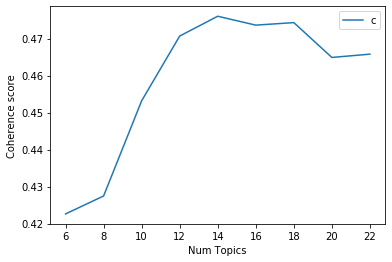

In [21]:
# Show graph

limit=24; start=6; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

**Print the Coherence Scores**

In [22]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 6  has Coherence Value of 0.4226
Num Topics = 8  has Coherence Value of 0.4274
Num Topics = 10  has Coherence Value of 0.4532
Num Topics = 12  has Coherence Value of 0.4707
Num Topics = 14  has Coherence Value of 0.4761
Num Topics = 16  has Coherence Value of 0.4737
Num Topics = 18  has Coherence Value of 0.4743
Num Topics = 20  has Coherence Value of 0.4649
Num Topics = 22  has Coherence Value of 0.4658


### Visualize the topics-keywords

#### PyLDAvis visualisation

We can use the PyLDAvis package to visualize our topics.

[Source](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/)

Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic. A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.

A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart.

If you move the cursor over one of the bubbles, the words and bars on the right-hand side will update. These words are the salient keywords that form the selected topic.

Use <code>conda install -c conda-forge pyldavis</code> to install the pyLDAvis package.

**Load the model with the highest coherence score**

In [25]:
from gensim.test.utils import datapath

# load some saved models
lda_model14 = models.LdaMulticore.load("models/v1/lda_model_" + str(14) +"topics")

**Topics and keywords**

In [28]:
for idx, topic in lda_model14.print_topics(-1):
            print('\nTopic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.083*"card" + 0.035*"credit" + 0.024*"charg" + 0.013*"one" + 0.013*"receiv" + 0.013*"purchas" + 0.012*"open" + 0.011*"offer" + 0.011*"citi" + 0.010*"citibank"

Topic: 1 
Words: 0.063*"bank" + 0.052*"check" + 0.028*"money" + 0.024*"chase" + 0.023*"fund" + 0.023*"deposit" + 0.018*"transact" + 0.015*"fee" + 0.014*"day" + 0.013*"transfer"

Topic: 2 
Words: 0.032*"inform" + 0.026*"credit" + 0.026*"report" + 0.023*"fraud" + 0.022*"inquiri" + 0.020*"paypal" + 0.019*"ident" + 0.019*"consum" + 0.017*"fraudul" + 0.016*"theft"

Topic: 3 
Words: 0.087*"call" + 0.031*"told" + 0.029*"phone" + 0.024*"number" + 0.022*"ask" + 0.017*"said" + 0.016*"inform" + 0.016*"back" + 0.014*"time" + 0.014*"contact"

Topic: 4 
Words: 0.117*"credit" + 0.105*"report" + 0.027*"remov" + 0.027*"disput" + 0.023*"inform" + 0.017*"bureau" + 0.013*"score" + 0.012*"compani" + 0.011*"file" + 0.011*"equifax"

Topic: 5 
Words: 0.027*"mortgag" + 0.015*"home" + 0.011*"servic" + 0.010*"properti" + 0.009*"modif" +

**Visualize it**

In [27]:
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model14, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10    -0.160954 -0.120504       1        1  11.630912
3     -0.024886 -0.194889       2        1   9.770658
1     -0.020277 -0.142767       3        1   9.586157
0     -0.010094 -0.043382       4        1   8.503208
8      0.061033 -0.075183       5        1   8.028638
5      0.066175  0.084756       6        1   7.513497
4      0.164537  0.063258       7        1   7.468102
11    -0.145887  0.030404       8        1   6.799225
9     -0.166866  0.188562       9        1   6.290138
6     -0.155374  0.117538      10        1   5.951903
7      0.215876  0.110814      11        1   5.721441
2      0.241571  0.017723      12        1   4.902863
13    -0.117153  0.065785      13        1   4.335694
12     0.052300 -0.102114      14        1   3.497568, topic_info=         Term           Freq          Total Category  logprob  loglift
32    payment  159823.000000  159823.000000  Default  30.0000  30.0000
56       bank  120503.000000  120503.000000  Default  29.0000  29.0000
85     report  103023.000000  103023.000000  Default  28.0000  28.0000
62     credit  165562.000000  165562.000000  Default  27.0000  27.0000
22       loan  110258.000000  110258.000000  Default  26.0000  26.0000
...       ...            ...            ...      ...      ...      ...
137    letter    1917.926025   47155.738281  Topic14  -5.2986   0.1509
1100  mortgag    1731.412109   27977.593750  Topic14  -5.4009   0.5706
42       sinc    1732.218872   36608.753906  Topic14  -5.4004   0.3022
186      time    1729.646240   90956.734375  Topic14  -5.4019  -0.6094
129    inform    1659.396484   86046.187500  Topic14  -5.4434  -0.5953

[1063 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
664       1  0.009484     &
664       2  0.003609     &
664       3  0.000283     &
664       4  0.013801     &
664       5  0.003680     &
...     ...       ...   ...
196      13  0.024314  year
196      14  0.069197  year
1407      1  0.982296  zale
1084      3  0.989735  zell
6132      5  0.982833  zion

[4713 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 4, 2, 1, 9, 6, 5, 12, 10, 7, 8, 3, 14, 13])